In [367]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

from sklearn.preprocessing import PolynomialFeatures

from itertools import chain, combinations_with_replacement

In [368]:
X, y = make_regression(10, 3, noise = 1)

In [371]:
y.shape

(10,)

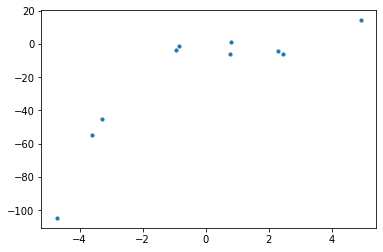

In [358]:
# data
# X, y = make_regression(10, 2, noise = 1)

l= 10

np.random.seed(0)
X = 2 - 3 * np.random.normal(0, 1, l)
y = X - 2 * (X ** 2) + 0.5 * (X ** 3) + np.random.normal(-3, 3, l)
plt.scatter(X,y, s=10)
plt.show()

In [338]:
X

array([-3.29215704,  0.79952837, -0.93621395, -4.7226796 , -3.60267397,
        4.93183364, -0.85026525,  2.45407162,  2.30965656,  0.76820449])

In [339]:
y

array([ -45.37731171,    1.13940516,   -3.81638806, -104.63168028,
        -54.60962435,   14.26534353,   -1.12128009,   -5.8165549 ,
         -4.25972022,   -5.74768563])

In [340]:
def polynomial_transformation(X, degree):
    
    m, n = X.shape
            
    feature_combinations = list(chain.from_iterable(combinations_with_replacement(range(n), i)
                                   for i in range(0, degree + 1)))
    
    Xn = np.zeros((m, len(feature_combinations)))
    
    for i, comb in enumerate(feature_combinations):
        Xn[:, i] = np.prod(X[:, comb], axis=1)
    
    return Xn

In [359]:
X = polynomial_transformation(X.reshape(-1,1), 2)
X

array([[ 1.        , -3.29215704, 10.83829796],
       [ 1.        ,  0.79952837,  0.63924562],
       [ 1.        , -0.93621395,  0.87649656],
       [ 1.        , -4.7226796 , 22.30370258],
       [ 1.        , -3.60267397, 12.97925974],
       [ 1.        ,  4.93183364, 24.32298305],
       [ 1.        , -0.85026525,  0.722951  ],
       [ 1.        ,  2.45407162,  6.02246754],
       [ 1.        ,  2.30965656,  5.3345134 ],
       [ 1.        ,  0.76820449,  0.59013814]])

In [365]:
U, S, V = np.linalg.svd(X.T.dot(X))
S = np.diag(S)
X_sq_reg_inv = V.dot(np.linalg.pinv(S)).dot(U.T)
w = X_sq_reg_inv.dot(X.T).dot(y)



In [366]:
w

array([-4.65440895,  9.31279002, -2.04829603])

In [332]:
#https://rickwierenga.com/blog/ml-fundamentals/polynomial-regression.html

class Linreg():
    
    """ Linear Regression """
    
    def __init__(self, alpha = 0.1, n_iter = 1000, degree=1):
        self.alpha = alpha
        self.n_iter = n_iter
        self.n = None
        self.m = None
        self.coefs = None
        self.intercept = None
        self.fitted = False

    def fit(self, X, y, optimization='normal', verbose=None):
        self.m, self.n = X.shape
                 
        # add 1s for bias
        xb = np.hstack((np.ones((self.m, 1)), X))
        
        # initiate coefs
        theta = np.ones((self.n + 1, 1))
        
        print(theta)
        
        # normal equation
        if optimization=='normal':
            if self.m < 50000:
                theta = np.linalg.inv(xb.T.dot(xb)).dot(xb.T).dot(y)
            else:
                optimization = 'gradient_descent'
        
        # gradient descent
        if optimization=='gradient_descent':
            
            for step in range(self.n_iter):

                # compute error
                error = self._error(xb, y, theta)
     
                # update gradients 
                gradients = 2 / self.m * xb.T.dot(error)
            
                # update theta 
                theta = theta - self.alpha * gradients
        
        # stochastic gradient descent
        if optimization=='stochastic':
            
            for step in range(self.n_iter):
                
                for i in range(self.m): 
                    
                    # random selection from input
                    random_index = np.random.randint(self.m)
                    xi = xb[random_index:random_index + 1]
                    yi = y[random_index:random_index + 1]
                    
                    # compute error
                    error = self._error(xi, yi, theta)
                    
                    # update gradients
                    gradients =  2 * xi.T.dot(error)
                
                    # get learning rate at each iteration from the schedule
                    eta = self._schedule(step * self.m + i)
                    
                    theta = theta - eta * gradients
            
        # fit instances
        self.coefs = theta[1:]
        self.intercept = theta[0]
        self.fitted = True
        return self
        
    def _schedule(self, t, t0=5):
        return t0 / (t + self.n_iter)
    
    @staticmethod
    def _error(X, y, theta):
        return X.dot(theta) - y.reshape(-1,1)
    
    @staticmethod
    def _mse(error):
        return (error ** 2).mean()
            
    def predict(self, X):
        if not self.fitted:
            raise Exception("Linreg is not yet fitted.")
        if len(X.shape) == 1:
            X = X.reshape(1,-1)
        if X.shape[1] != self.n:
            raise Exception(f"Input data shape must be equal to fit data shape: {self.n}")
        return X.dot(self.coefs)
                
    def __repr__(self):
        if self.fitted:
            return f"coefficients: {self.coefs}, \n\n intercept: {self.intercept}"
        return self.__class__.__name__

# Check against sklearn 

### Linear - gradient descent

In [333]:
predictors = np.array([1, 1])

In [342]:
l = Linreg(0.1, 1000)
l

Linreg

In [343]:
l.fit(X, y, optimization='normal')

[[1.]
 [1.]
 [1.]
 [1.]]


LinAlgError: Singular matrix

In [336]:
x = LinearRegression().fit(X, y)
x.coef_, x.intercept_

(array([81.21829221, 67.33476741, 24.61362991]), -0.1624065473703311)

In [326]:
l.predict(predictors)

Exception: Linreg is not yet fitted.

In [178]:
x.predict(predictors.reshape(1,-1))

array([142.24291016])

### Linear - stochastic gradient descent

In [179]:
ls = Linreg(0.1, 50)
ls

Linreg

In [180]:
ls.fit(X, y, 'stochastic')

coefficients: [[74.26144444]
 [68.29539515]], 

 intercept: [-0.78306138]

In [181]:
from sklearn.linear_model import SGDRegressor

In [182]:
s = SGDRegressor(penalty=None, eta0=0.1).fit(X, y)
s.coef_, s.intercept_

(array([74.21395126, 68.53924532]), array([-0.55868551]))

In [183]:
ls.predict(predictors)

array([[142.55683959]])

In [184]:
s.predict(predictors.reshape(1,-1))

array([142.19451108])

In [ ]:
np.random.randint(10)

In [2]:
import numpy as np

In [3]:
x = np.array([[85.965],
       [98.743],
       [87.319]])

In [6]:
x.flatten()

array([85.965, 98.743, 87.319])